# Name: Ji WEI
# June 3rd, 2017
# 3. A one sentence description of your approach
# 4. The estimated AUC you would expect to get on the test.csv data
# 5. A one sentence description of a special skill you demonstrated

In [1]:
import os

import numpy as np
import pandas as pd
import statsmodels
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

from sklearn import linear_model, metrics, model_selection

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('train.csv')
df

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome
0,56,0.005737,iPhone,M,0,62717,2,1,4,0
1,50,0.004733,desktop,F,0,64328,2,3,2,0
2,54,0.004129,laptop,M,0,83439,1,3,7,0
3,16,0.005117,Android,F,0,30110,2,3,0,0
4,37,0.003635,desktop,M,0,76565,2,1,5,0
...,...,...,...,...,...,...,...,...,...,...
9995,41,0.004225,desktop,M,0,64489,2,3,8,0
9996,50,0.004751,other,F,0,88643,1,3,0,0
9997,60,0.003804,other,M,0,87870,2,2,9,0
9998,18,0.003838,laptop,M,0,56468,2,2,0,0


In [3]:
print(df.shape)
print (sum([True for idx,row in df.iterrows() if any(row.isnull())]))
null_data = df[df.isnull().any(axis=1)]
null_data
#Dig into numeric variables, find the missing value.

(10000, 10)
269


,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome
15,32,0.003519,Android,NaN,0,71909,1,3,8,0
38,54,0.005529,iPhone,NaN,0,87122,2,3,8,0
91,35,0.005510,iPhone,NaN,0,52343,1,3,3,0
113,41,0.004282,Android,NaN,0,72978,2,2,11,0
122,34,0.005518,iPhone,NaN,0,50425,2,3,3,0
...,...,...,...,...,...,...,...,...,...,...
9598,58,0.003698,Android,NaN,1,84495,2,1,17,0
9661,21,0.003397,laptop,NaN,1,34907,2,3,0,0
9745,55,0.003876,Android,NaN,1,69374,1,3,15,0
9886,41,0.004150,Android,NaN,1,46060,2,2,2,0


In [4]:
df.outcome.value_counts()

0    9018
1     982
Name: outcome, dtype: int64

In [5]:
df.gender.value_counts(dropna = False)

F      4970
M      4761
NaN     269
Name: gender, dtype: int64

In [6]:
pd.crosstab(df['outcome'], df['gender'])
df.dropna(subset= ['gender'], inplace = True)
df

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome
0,56,0.005737,iPhone,M,0,62717,2,1,4,0
1,50,0.004733,desktop,F,0,64328,2,3,2,0
2,54,0.004129,laptop,M,0,83439,1,3,7,0
3,16,0.005117,Android,F,0,30110,2,3,0,0
4,37,0.003635,desktop,M,0,76565,2,1,5,0
...,...,...,...,...,...,...,...,...,...,...
9994,58,0.003941,Android,M,0,95916,1,1,18,0
9995,41,0.004225,desktop,M,0,64489,2,3,8,0
9996,50,0.004751,other,F,0,88643,1,3,0,0
9997,60,0.003804,other,M,0,87870,2,2,9,0


In [7]:
df.device_type.value_counts(dropna = False)

desktop    1988
Android    1980
other      1936
laptop     1922
iPhone     1905
Name: device_type, dtype: int64

In [8]:
device_df = pd.get_dummies(df.device_type, prefix = 'device')
gender_df = pd.get_dummies(df.gender, prefix = 'gender')
df = df.join([device_df , gender_df])

In [9]:
df.columns

Index(['age', 'cost_of_ad', 'device_type', 'gender',
       'in_initial_launch_location', 'income', 'n_drivers', 'n_vehicles',
       'prior_ins_tenure', 'outcome', 'device_Android', 'device_desktop',
       'device_iPhone', 'device_laptop', 'device_other', 'gender_F',
       'gender_M'],
      dtype='object')

In [10]:
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
train, tests = df[df['is_train']==True], df[df['is_train']==False]


In [11]:
columns = ['age','cost_of_ad','gender_F','gender_M','in_initial_launch_location','income','device_Android',\
        'device_iPhone', 'device_laptop','device_other','n_vehicles','prior_ins_tenure']

In [12]:
train.outcome.value_counts()

0    6512
1     741
Name: outcome, dtype: int64

In [179]:
train_0 = train[train.outcome == 0].sample(725)
train_1 = train[train.outcome == 1].sample(725)
train = pd.concat([train_0, train_1])
train.outcome.value_counts()

1    725
0    725
Name: outcome, dtype: int64

In [13]:
print (tests.shape)
print (train.shape)

(2478, 18)
(7253, 18)


In [14]:
train_X = train[columns]
train_y = train['outcome']

In [18]:
lr = linear_model.LogisticRegression(C = 10 ** 2, class_weight= 'balanced').fit(train_X, train_y)

In [19]:
lr.score(train_X, train_y)

0.70219219633255203

In [20]:
tests_X = tests[columns]
tests_y = tests['outcome']
results = lr.predict(tests_X)
tests['predictions'] = results
probs = lr.predict_proba(tests_X)
probs.mean()


/Users/weiji/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0.5

In [21]:
pd.crosstab(tests_y, results, rownames=['actual'], colnames=['preds'])

preds,0,1
actual,,
0,1611,635
1,45,187


In [22]:
lr.score(tests_X, tests_y)

0.7255851493139629

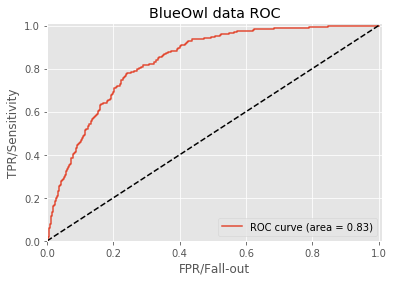

In [23]:
p_hat = lr.predict_proba(tests_X).T[1]
fpr, tpr, thresholds = metrics.roc_curve(tests_y, p_hat)

plt.figure()
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1.01])
plt.ylim([0, 1.01])
plt.xlabel('FPR/Fall-out')
plt.ylabel('TPR/Sensitivity')
plt.title("BlueOwl data ROC")
plt.legend(loc = 'lower right')